# Project Title :Customer Churn Analytics:


# Abstract

In the competitive landscape of telecommunications, customer churn poses a significant challenge, impacting revenue and market share. This project aims to analyze customer churn patterns within a telecom company to understand the underlying factors contributing to customer attrition. The study leverages historical customer data, including demographic information, service usage metrics, and customer interaction logs. Through exploratory data analysis and predictive modeling techniques, key drivers of churn will be identified, such as service dissatisfaction, pricing strategies, contract terms, and customer support effectiveness.

# Problem Statement:



 The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer chum patterns, we aim to identify the factors that contribute to churn and develop strategies to mitigate it.

# Project Description:


In this project, we will work with a dataset from a telecom company that includes information about their customers, such as demographics, customer Accounting information, Service information. The dataset will also include a churn indicator that specifies nether a customer has churned or not.

Desired problen
come(Objective or goal)The main objective is to find out the reasons for call drops and voice connectivity
Built a classification predictive model to predict call drop


# DesiredOutcome:

our main goal is to  bulid a computer program that can predict when a customer might leave the company

# Algorithms:


LogisticRegression,DecisionTreeClassifier,RandomForestClassifer,AddaboostClassifier,GradientBoostClassifer

# About Data

Data is divided into 3 Types

# Demographic information:

• gender: Whether the customer is a male or a female.

• SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

• Partner: Whether the customer has a partner or not (Yes, No)

• Dependents : Whether the customer has dependents or not (Yes, No)


# Customer Acconting Information:


• Contract: The contract term of the customer (Month-to-month, One year, Two year)

• PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

• MonthlyCharges: The amount charged to the customer monthly

• TotalCharges: The total amount charged to the customer

• tenure: Number of months the customer has stayed with the company

• PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (au card (automatic))

• customeriD: Customer ID



# Service information

PhoneService: Whether the customer has a phone service or not (yes, No)

• MultipleLines: Whether the customer has multiple lines or not (yes, No, No phone service)

• InternetService: Customer's internet service provider (DSL, Fiber optic, No)

• OnlineSecurity: Whether the customer has online security or not (yes, No, No internet service)

• OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

• DeviceProtection: Whether the customer has device protection or not (yes, No, No internet service)

• TechSupport: Whether the customer has tech support or not (yes, No, No internet service)

• Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

•StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)




# Traget variable
• Churn: Whether the customer churn or not (yes or No)*

# 1. Data Preparation - (EDA & Feature Engineering -Data Analytics )

In [1]:
#EDA
import numpy as np
import pandas as pd 

#data visualations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()
os.chdir(r"C:\Users\user\OneDrive\Desktop\My Projects\Customer_churn_project")

In [3]:
telco_base_data=pd.read_csv(r"c:\Users\user\OneDrive\Desktop\capstone project - ML\CUSTOMER CHURN\Customer_churn_project\Telco-Customer-Churn.csv")

In [4]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_base_data.shape

(7043, 21)

In [6]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Knowling the unique values

In [7]:
for col in telco_base_data.columns:
    print("column:{} -Unique Values: {}".format(col,telco_base_data[col].unique()))

column:customerID -Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:gender -Unique Values: ['Female' 'Male']
column:SeniorCitizen -Unique Values: [0 1]
column:Partner -Unique Values: ['Yes' 'No']
column:Dependents -Unique Values: ['No' 'Yes']
column:tenure -Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column:PhoneService -Unique Values: ['No' 'Yes']
column:MultipleLines -Unique Values: ['No phone service' 'No' 'Yes']
column:InternetService -Unique Values: ['DSL' 'Fiber optic' 'No']
column:OnlineSecurity -Unique Values: ['No' 'Yes' 'No internet service']
column:OnlineBackup -Unique Values: ['Yes' 'No' 'No internet service']
column:DeviceProtection -Unique Values: ['No' 'Yes' 'No internet service']
column:TechSupport -Unique Values: ['No' '

In [8]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [10]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

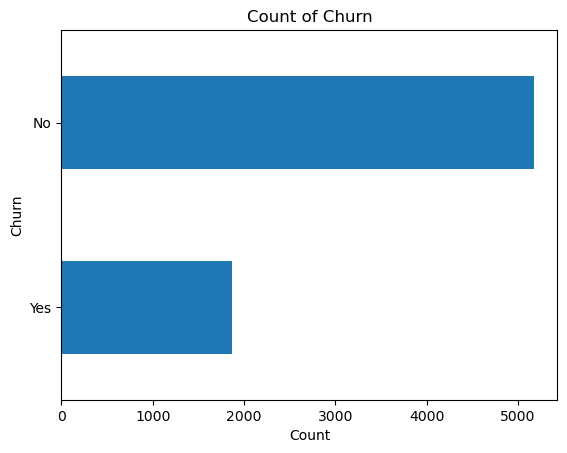

In [12]:
telco_base_data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()  # Invert y-axis to have 'No Churn' on top
plt.show()


In [13]:
telco_base_data['Churn'].value_counts()/len(telco_base_data)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [14]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
telco_data=telco_base_data.copy()

In [17]:
telco_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
telco_data.loc[telco_data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
telco_data.isna().sum()/len(telco_data)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

# 4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.0015%, it is safe to ignore them from further processing.


In [21]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [22]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [23]:

# Define the bins and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

# Create the tenure_group column
telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=bins, labels=labels, right=False)


In [24]:
 telco_data['tenure_group'].value_counts()



tenure_group
1 - 12     2058
61 - 72    1121
13 - 24    1047
25 - 36     876
49 - 60     820
37 - 48     748
Name: count, dtype: int64

In [25]:
 telco_data['tenure_group'].value_counts()/len(telco_data)

tenure_group
1 - 12     0.292662
61 - 72    0.159414
13 - 24    0.148891
25 - 36    0.124573
49 - 60    0.116610
37 - 48    0.106371
Name: count, dtype: float64

6. Remove columns not required for processing

In [26]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Data Exploration
*1. * Plot distibution of individual predictors by churn

Univariate Analysis

In [27]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [28]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [29]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3508,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,7939.25,0,61 - 72
3180,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,63.60,0,1 - 12
4155,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.25,0,NaN


In [30]:
telco_data.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int32
tenure_group        category
dtype: object

3. Convert all the categorical variables into dummy variables

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le

LabelEncoder()

In [32]:
categ=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

telco_data[categ] = telco_data[categ].apply(le.fit_transform)

In [33]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6149,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,25.85,25.85,0,0
546,1,0,1,1,1,0,1,0,2,0,0,2,0,0,1,3,86.30,3266.00,1,3
845,0,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,20.55,295.95,0,1


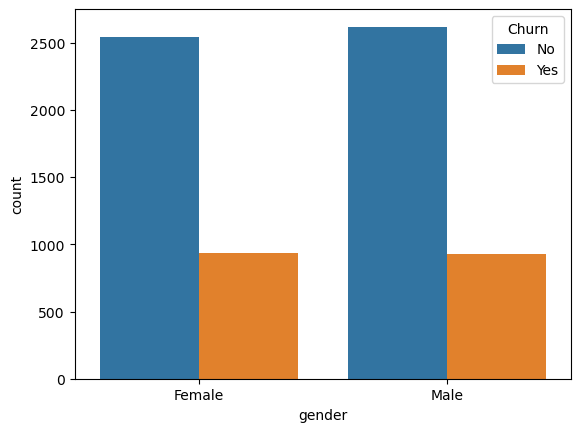

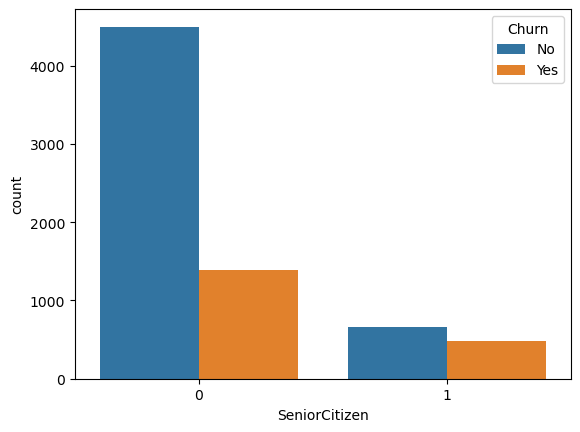

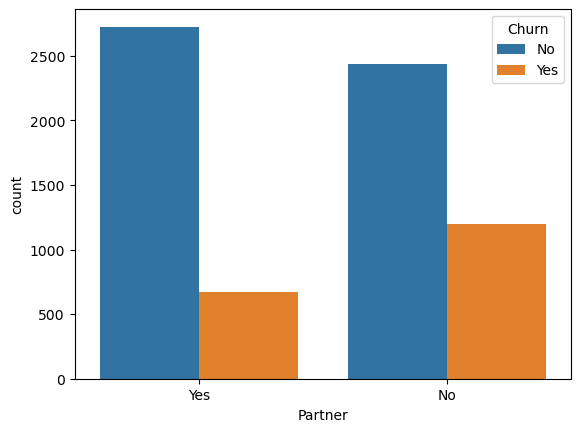

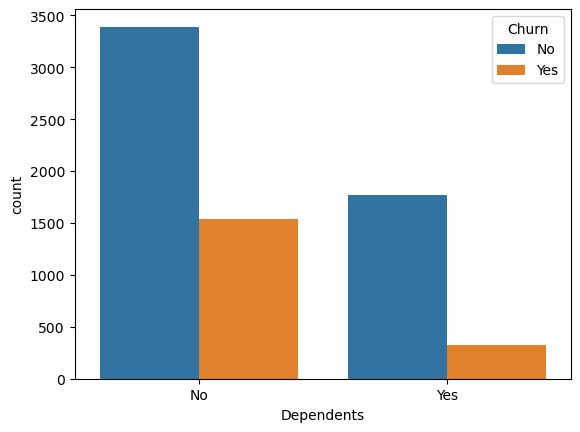

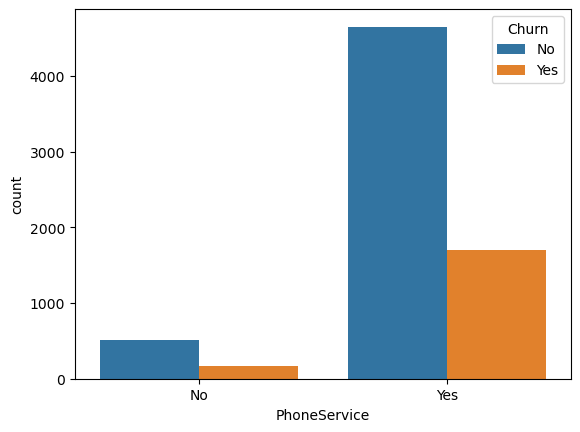

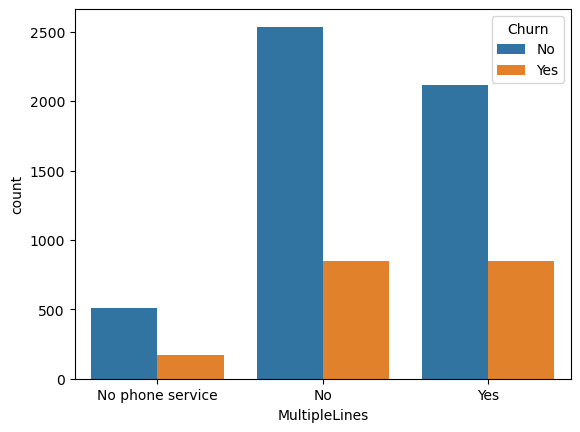

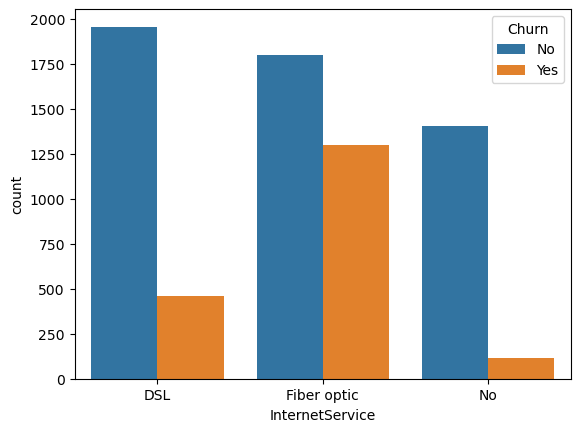

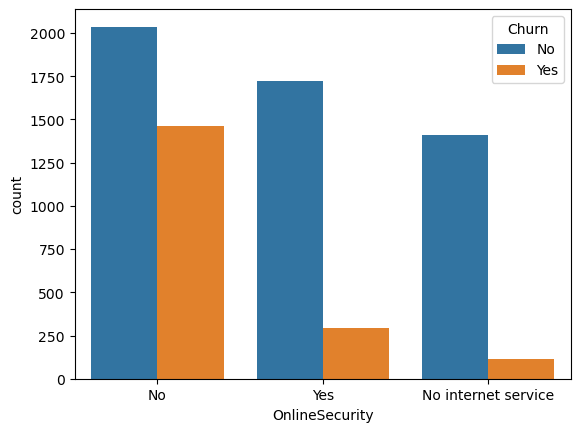

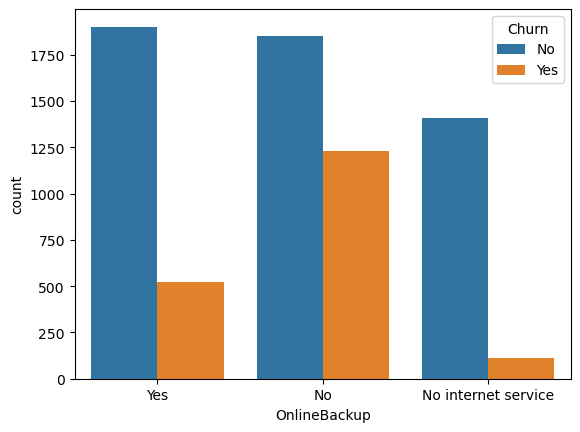

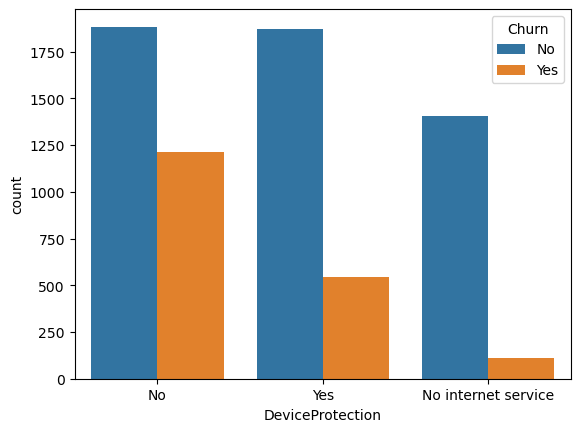

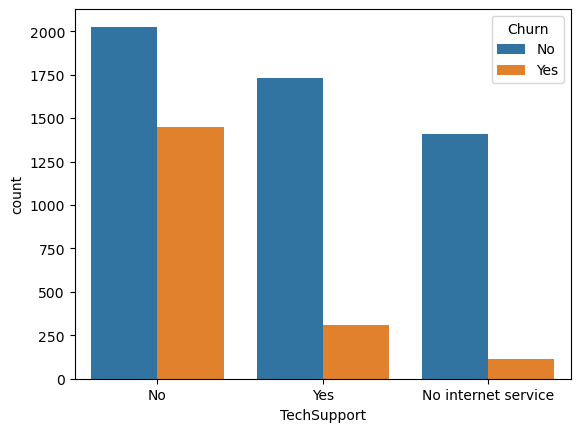

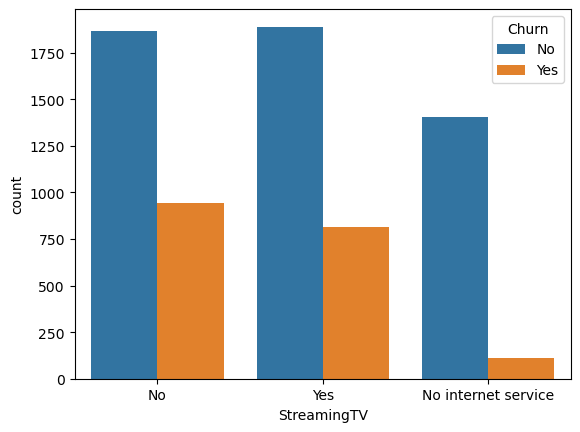

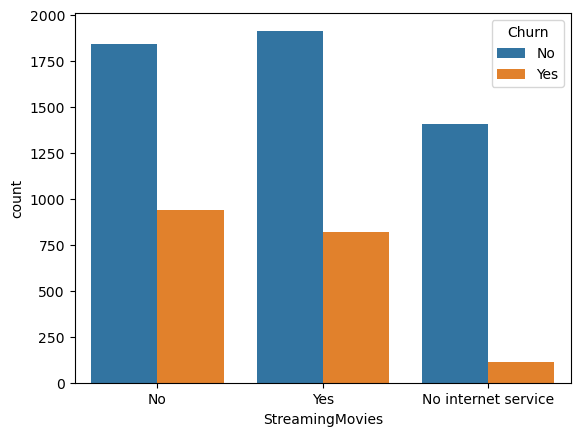

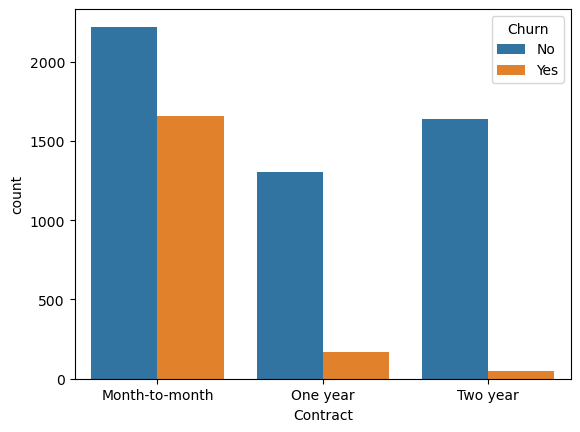

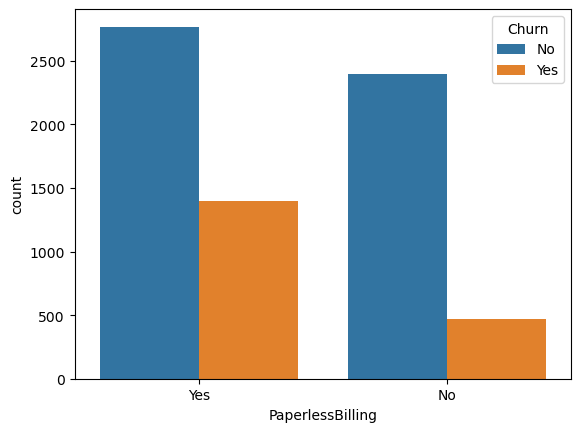

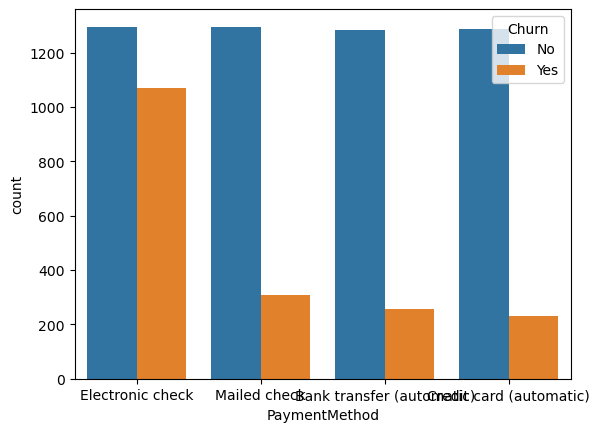

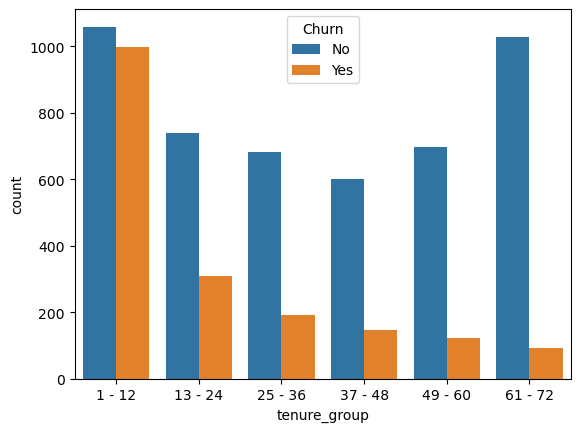

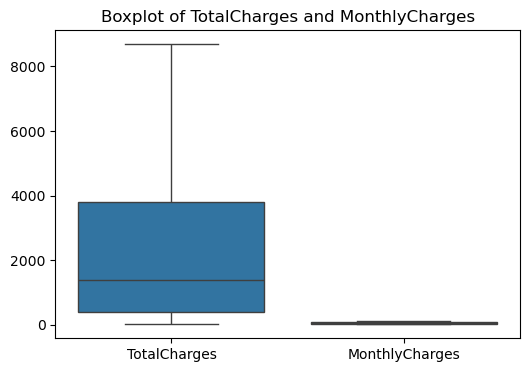

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=telco_data[['TotalCharges', 'MonthlyCharges']])
plt.title("Boxplot of TotalCharges and MonthlyCharges")
plt.show()

*9. * Relationship between Monthly Charges and Total Charges

In [35]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

*10. * Churn by Monthly Charges and Total Charges

In [36]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\user\AppData\Local\Temp\ipykernel_16276\1021104028.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
C:\Users\user\AppData\Local\Temp\ipykernel_16276\1021104028.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

# Insight: Churn is high when Monthly Charges are high

In [37]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

C:\Users\user\AppData\Local\Temp\ipykernel_16276\2039743036.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
C:\Users\user\AppData\Local\Temp\ipykernel_16276\2039743036.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

*11. Build a corelation of all predictors with 'Churn' *

In [38]:
plt.figure(figsize=(20,8))
telco_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

*Derived Insight: *

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data.corr(), cmap="Paired")

<Axes: >

Bivariate Analysis

In [40]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [41]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

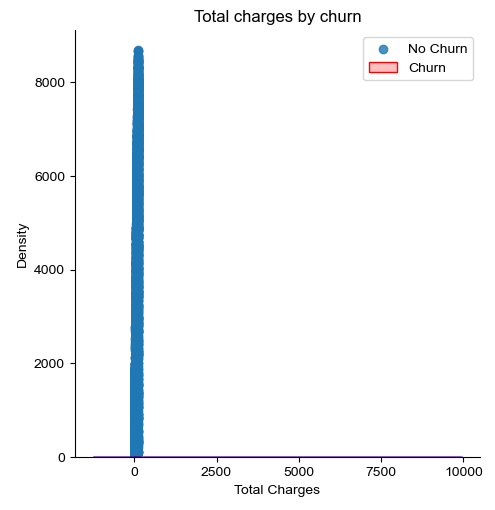

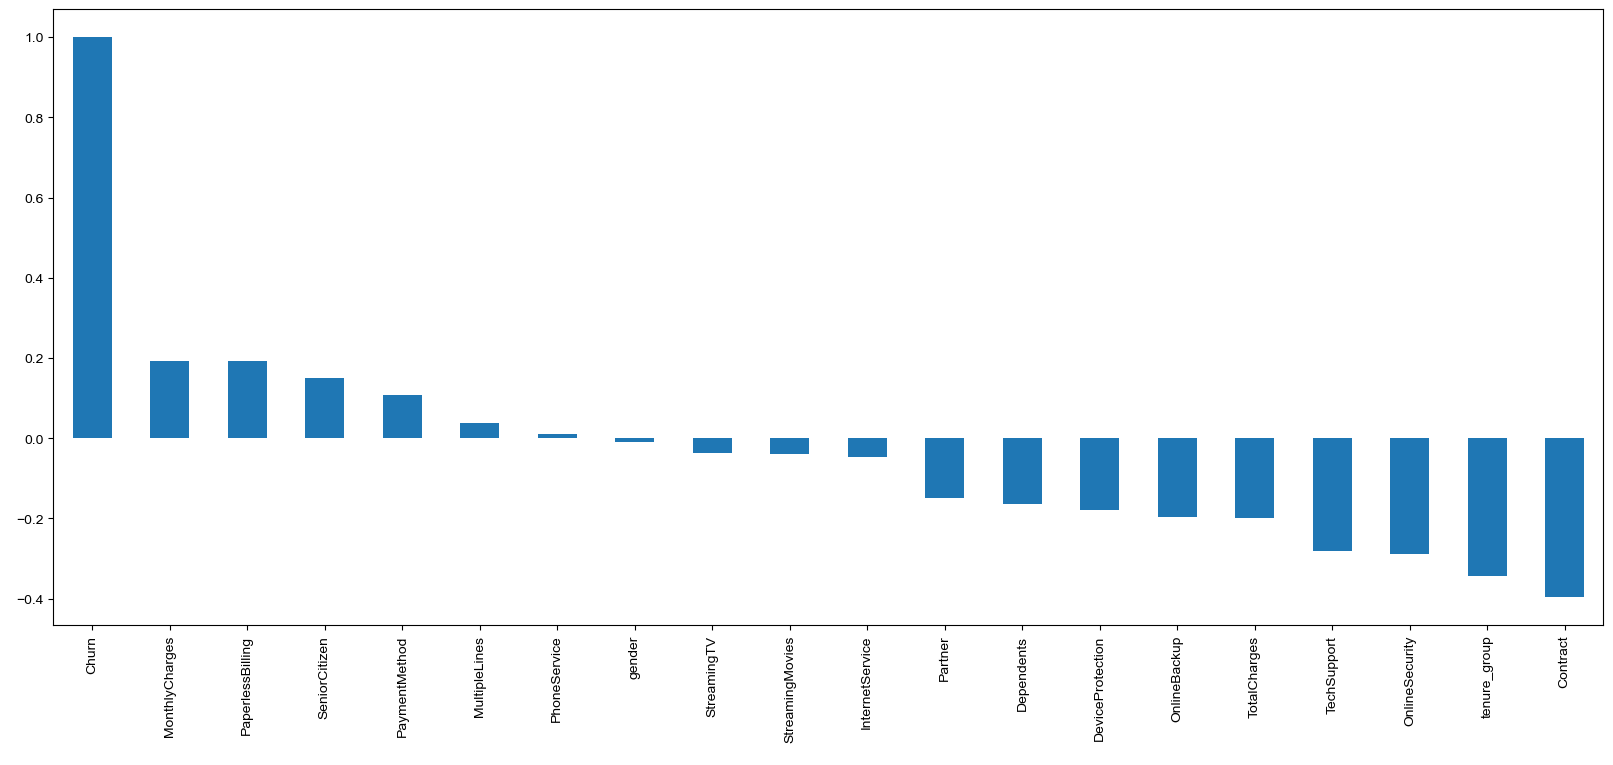

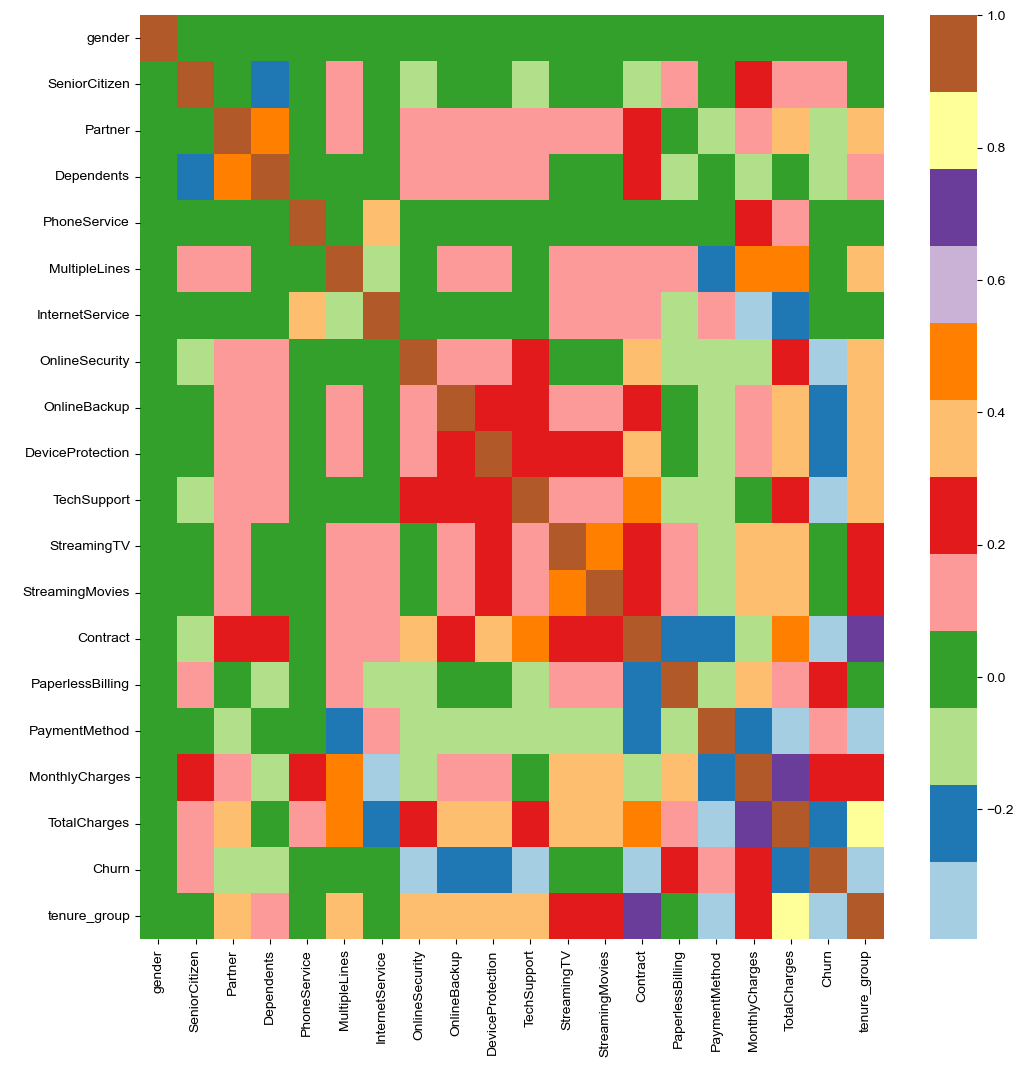

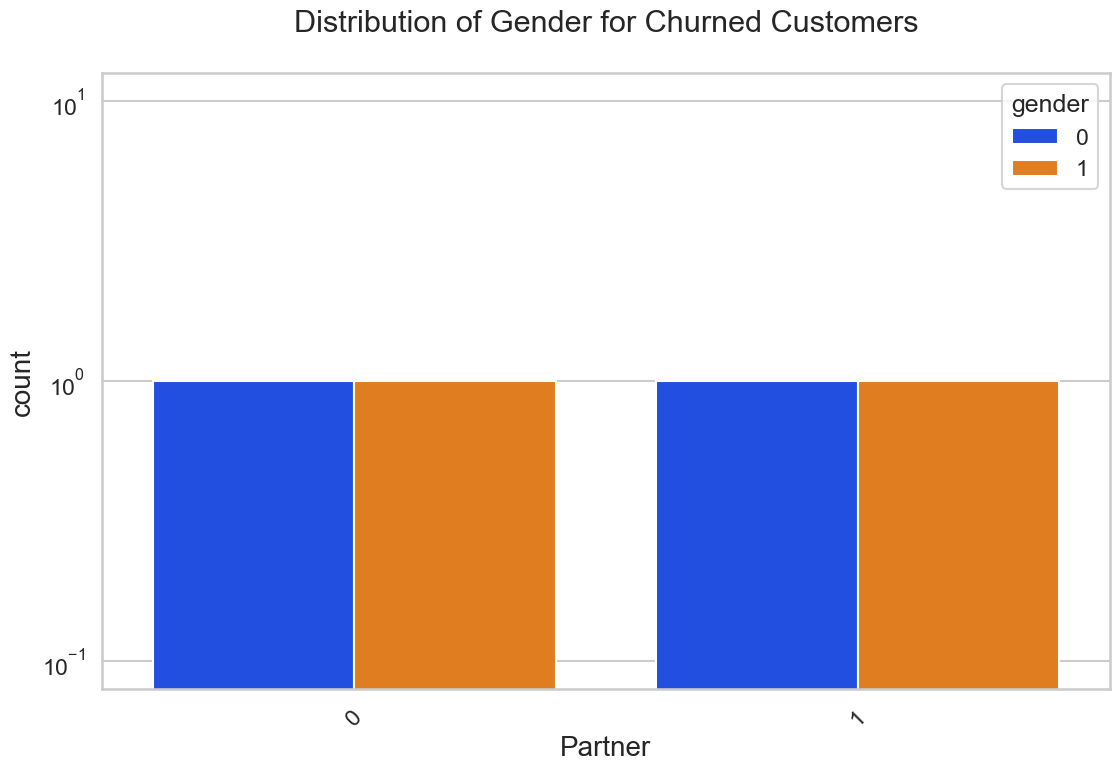

In [42]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

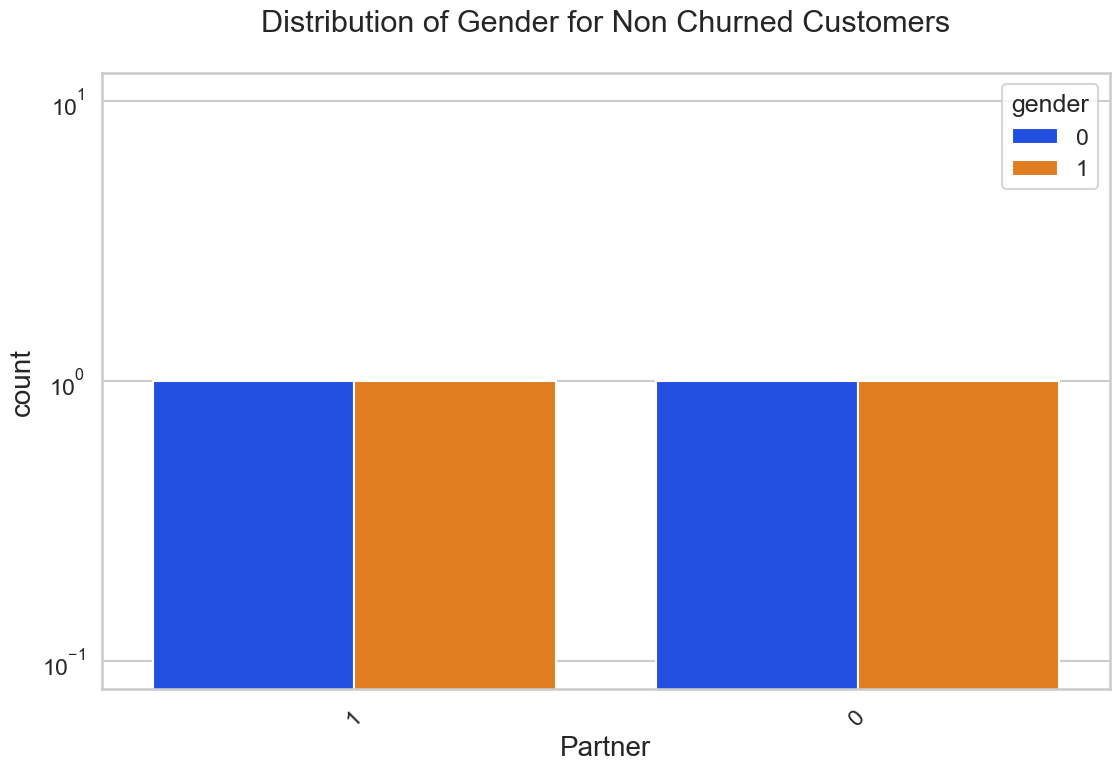

In [43]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

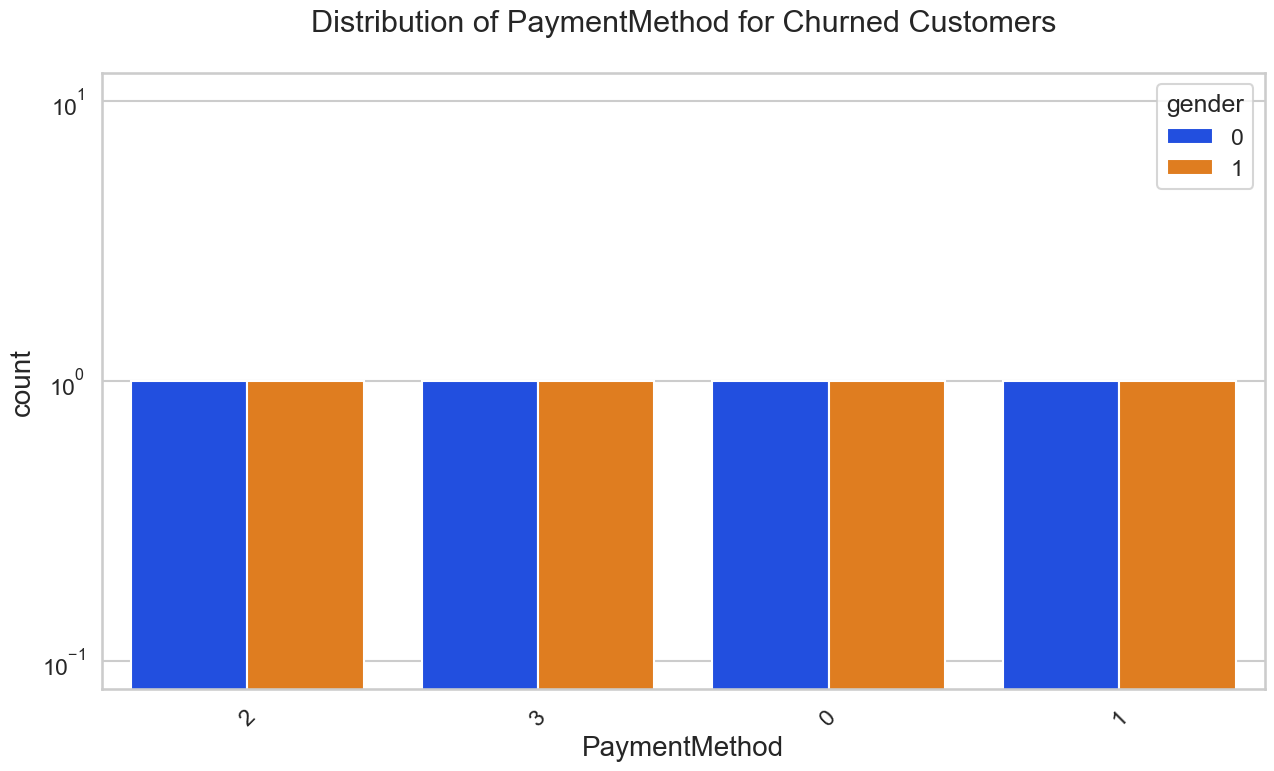

In [44]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

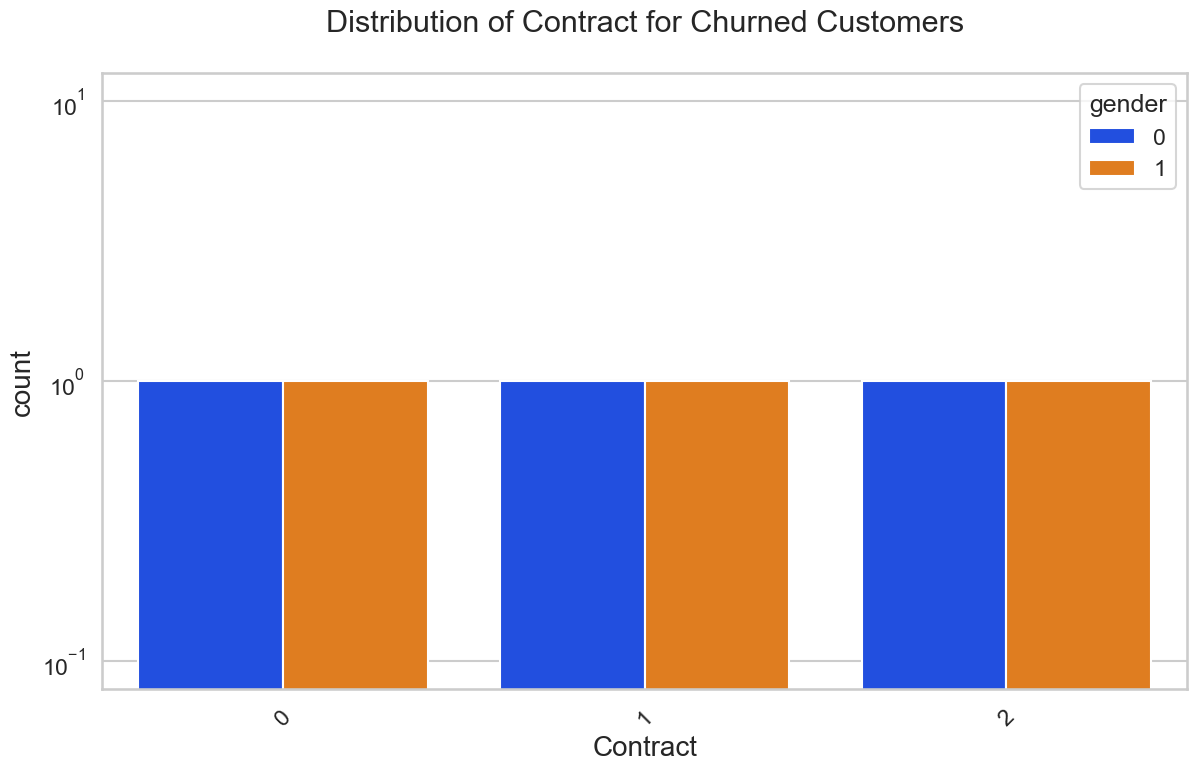

In [45]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

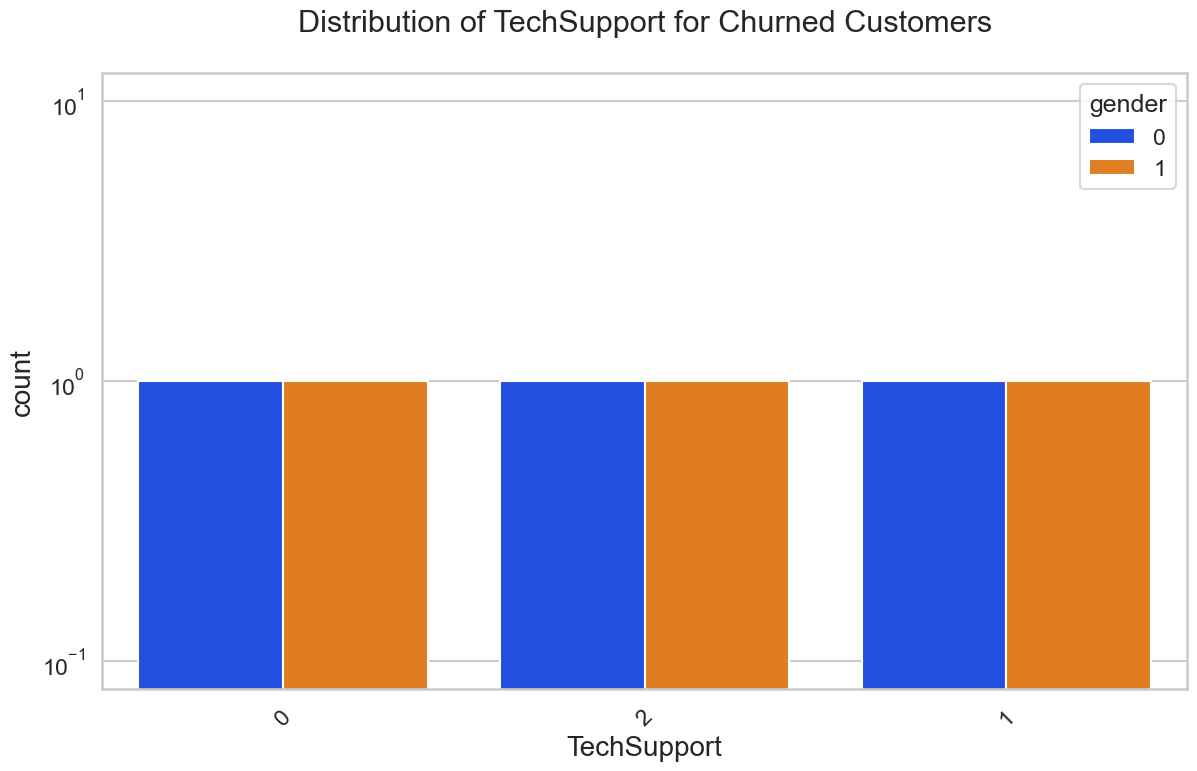

In [46]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

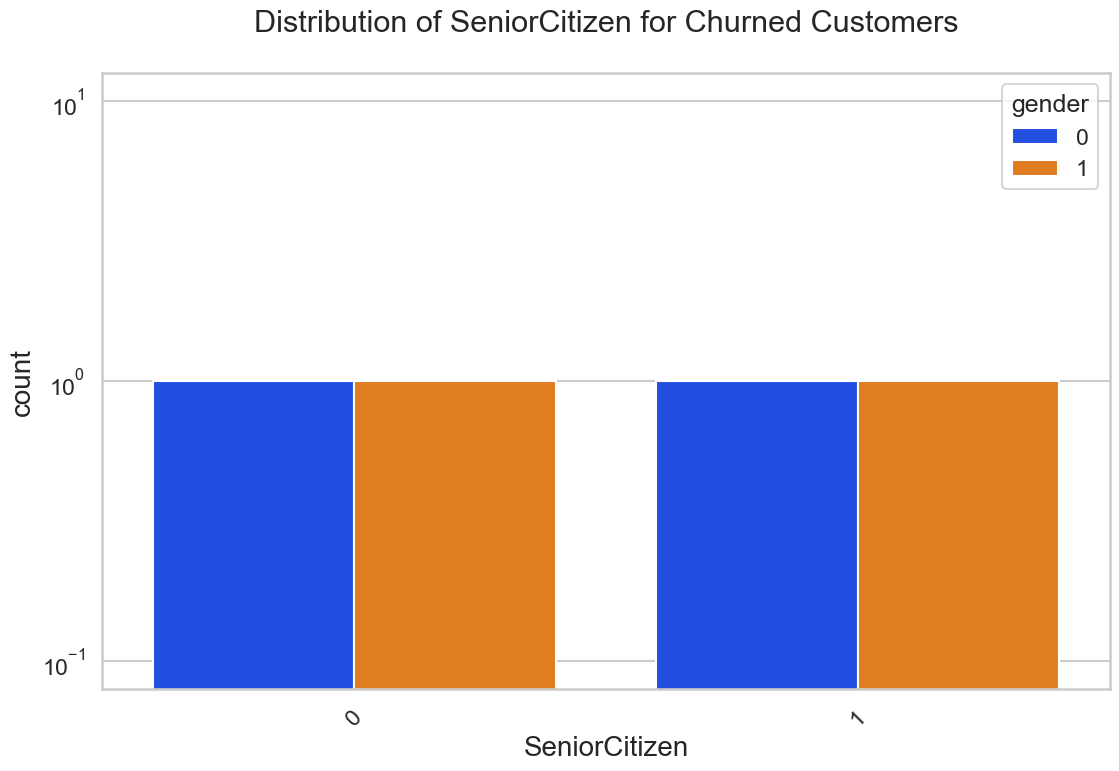

In [47]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [48]:
X=telco_data.drop('Churn',axis=1)
y=telco_data['Churn']

In [49]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [50]:
telco_data['Churn'].value_counts()/len(telco_data) #data is highly imbalancing

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

Train Test Split

In [51]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
print('Traing data shape')

print(X_train.shape)
print(y_train.shape)




print('Testing Data shape')

print(X_test.shape)
print(y_test.shape)

Traing data shape
(5625, 19)
(5625,)
Testing Data shape
(1407, 19)
(1407,)


In [53]:
print(y_test.value_counts())

print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


In [54]:
from sklearn.tree import DecisionTreeClassifier



In [55]:
model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [56]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [57]:
model_dtc.score(X_test,y_test)

0.7619047619047619

In [58]:
y_pred=model_dtc.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [59]:
print(y_test[:10])

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.56      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



''' As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)'''


'''main advantage of using SMOTEENN is that it addresses both overfitting and underfitting issues that can arise from class imbalance. By generating synthetic samples and removing noisy ones'''


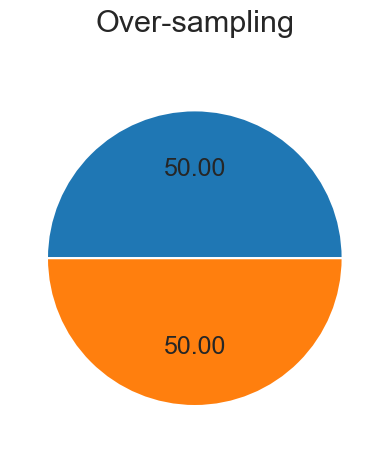

In [61]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X_ovs,y_ovs=smote.fit_resample(X,y)



fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


In [62]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_ovs, y_ovs,test_size=0.2,random_state=42)

In [63]:

from sklearn.linear_model  import LogisticRegression

model_lr=LogisticRegression(max_iter=1000)


In [64]:
model_lr.fit(Xr_train,yr_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [65]:
y_pred=model_lr.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [66]:
model_lr.score(Xr_test,yr_test)

0.8039690222652468

In [67]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(y_pred, yr_test, labels=[0, 1])

print(report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       968
           1       0.84      0.78      0.81      1098

    accuracy                           0.80      2066
   macro avg       0.80      0.81      0.80      2066
weighted avg       0.81      0.80      0.80      2066



In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[800, 237],
       [168, 861]], dtype=int64)

Decision Tree classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [70]:
model_dtc.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [71]:
y_pred=model_dtc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [72]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [73]:
model_dtc.score(Xr_test,yr_test)

0.8044530493707648

In [74]:
print(classification_report(yr_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1037
           1       0.80      0.82      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [75]:
confusion_matrix(yr_test,y_pred)

array([[820, 217],
       [187, 842]], dtype=int64)

Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

In [77]:
model_rfc.fit(Xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [78]:
y_pred=model_rfc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [79]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [80]:
model_rfc.score(Xr_test,yr_test)

0.8180058083252663

In [81]:
report_rfc=classification_report(y_pred,yr_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       917
           1       0.88      0.78      0.83      1149

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [82]:
confusion_matrix(yr_test,y_pred)

array([[789, 248],
       [128, 901]], dtype=int64)

AdaBoost

In [83]:
from sklearn.ensemble import  AdaBoostClassifier

In [84]:
model_abc=AdaBoostClassifier(n_estimators=100)

In [85]:
model_abc.fit(Xr_train,yr_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [86]:
y_pred=model_abc.predict(Xr_test)

In [87]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       939
           1       0.87      0.80      0.83      1127

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [88]:
confusion_matrix(yr_test,y_pred)

array([[808, 229],
       [131, 898]], dtype=int64)

GradientBoostingClassifer

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc



GradientBoostingClassifier()

In [90]:
model_gbc.fit(Xr_train,yr_train)

GradientBoostingClassifier()

In [91]:
y_pred_gbc=model_gbc.predict(Xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [92]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [93]:
print(classification_report(y_pred_gbc,yr_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       948
           1       0.88      0.81      0.84      1118

    accuracy                           0.83      2066
   macro avg       0.83      0.84      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [94]:
confusion_matrix(yr_test,y_pred)

array([[808, 229],
       [131, 898]], dtype=int64)

Xgboost

In [95]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(class_weight={0:1, 1:2})

model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [97]:
model_xgb.fit(Xr_train,yr_train)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [08:40:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [98]:
y_pred=model_xgb.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [99]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [100]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1014
           1       0.85      0.83      0.84      1052

    accuracy                           0.83      2066
   macro avg       0.83      0.84      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [101]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred and y_test are your predicted and true labels respectively
cm = confusion_matrix(yr_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[855 182]
 [159 870]]


 GradientBoostingClassifier and adaboost has accuracy i go with Gradientboostingclassifier /finding the best hyperparameter

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = GradientBoostingClassifier()
param_dist = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],  # Example: Adding max_depth parameter
    'min_samples_split': [2, 5, 10]  # Example: Adding min_samples_split parameter
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(Xr_train, yr_train)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


RandomizedSearchCV took 99.26 seconds to complete.
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1}


# final model

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
   'n_estimators': 100, 'min_samples_split':5 , 'max_depth': 7, 'learning_rate': 0.1
    
    
    
}

# Create Gradient Boosting Classifier with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data
final_gb_classifier.fit(Xr_train, yr_train)


GradientBoostingClassifier(max_depth=7, min_samples_split=5)

In [104]:
from sklearn.model_selection import cross_val_score

# trained model with tuned hyperparameters
# X_train and y_train are your training data
# cv=10 indicates 10-fold cross-validation
cv_scores = cross_val_score(final_gb_classifier, Xr_train, yr_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.82687651 0.86803874 0.83898305 0.84140436 0.84382567 0.84866828
 0.83050847 0.82929782 0.83414044 0.86440678]
Mean CV score: 0.8426150121065377


In [105]:
y_pred=final_gb_classifier.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [106]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [107]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1001
           1       0.86      0.83      0.84      1065

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [108]:
confusion_matrix(y_pred,yr_test)

array([[854, 147],
       [183, 882]], dtype=int64)

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners

Non senior Citizens are high churners

Pickle file

In [109]:
import os 
import pickle
from sklearn.ensemble import GradientBoostingClassifier



# Assuming final_gb_classifier is your trained model
# Define and train Gradient Boosting Classifier
best_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1
}

final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data (assuming Xr_train and yr_train are defined)
final_gb_classifier.fit(X_train, y_train)

# Dumping the model to a file
with open('final_gb_classifier.pkl', 'wb') as file:
    pickle.dump(final_gb_classifier, file)

# Load the saved model
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


Checking accuravy with our features


In [110]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 0 0 1 0]
